# **Chapter 3 - Machine Learning for Classification, Churn Prediction Problem**

## 3.2 - Data Preparation

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("/workspaces/ml-zoomcamp/03-Classification/churn_data copy.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [125]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [126]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [127]:
categorical_cols = df.select_dtypes("object").columns

In [128]:
for c in categorical_cols:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [129]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [130]:
# Look at the data types
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [131]:
# totalcharges is labelled as object but should be a float
try:
    pd.to_numeric(df["totalcharges"])
except Exception as e:
    print(e)

Unable to parse string "_" at position 488


In [132]:
# We can find a non-number at index 488
df.iloc[488]

customerid                         4472-lvygi
gender                                 female
seniorcitizen                               0
partner                                   yes
dependents                                yes
tenure                                      0
phoneservice                               no
multiplelines                no_phone_service
internetservice                           dsl
onlinesecurity                            yes
onlinebackup                               no
deviceprotection                          yes
techsupport                               yes
streamingtv                               yes
streamingmovies                            no
contract                             two_year
paperlessbilling                          yes
paymentmethod       bank_transfer_(automatic)
monthlycharges                          52.55
totalcharges                                _
churn                                      no
Name: 488, dtype: object

In [133]:
# Empty space value was replaced by an underscore
df["totalcharges"] = pd.to_numeric(df.totalcharges, errors="coerce").fillna(0)
df["totalcharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [134]:
# We can find the missing values
df[tc.isnull()][["customerid", "totalcharges"]]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [135]:
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [136]:
df.churn = (df.churn == "yes").astype("int")

In [137]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## **3.3 Setting up the Validation Framework**

In [138]:
# Using Scikit-learn to split the data
from sklearn.model_selection import train_test_split

In [139]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [140]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [141]:
len(df_full_train), len(df_test)

(5634, 1409)

In [142]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [143]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [144]:
# Index is shuffled
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [145]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [146]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [147]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

## **3.4 - Exploratory Data Analysis (EDA)**

In [148]:
df_full_train = df_full_train.reset_index(drop=True)

In [149]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [150]:
# No missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [151]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [152]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [153]:
# We can see that 27% of people churn
global_churn_rate = df_full_train.churn.mean()

In [154]:
round(global_churn_rate*100, 2)

np.float64(27.0)

In [155]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [156]:
numerical = ["tenure", "monthlycharges", "totalcharges"]

In [157]:
categorical = [c for c in df.columns if c not in numerical + ["customerid", "churn"]]
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [158]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## **3.5 - Feature Importance: Churn rate and Risk Ratio**

In [159]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [160]:
female_churn = df_full_train[df_full_train.gender=="female"].churn.mean()
male_churn = df_full_train[df_full_train.gender=="male"].churn.mean()

In [161]:
# We can see that 
global_churn_rate, female_churn, male_churn

(np.float64(0.26996805111821087),
 np.float64(0.27682403433476394),
 np.float64(0.2632135306553911))

In [162]:
partner_yes_churn = df_full_train[df_full_train.partner=="yes"].churn.mean()
partner_no_churn = df_full_train[df_full_train.partner=="no"].churn.mean()

In [163]:
global_churn_rate, partner_yes_churn, partner_no_churn

(np.float64(0.26996805111821087),
 np.float64(0.20503330866025166),
 np.float64(0.3298090040927694))

We can see that the gender does not make a big impact on churn rate but having a partner casues a big deviation in churn rate

**Risk Rate**

In [164]:
partner_no_churn / global_churn_rate

np.float64(1.2216593879412643)

In [165]:
df_group = df_full_train.groupby("gender").churn.agg(["mean", "count"])
df_group["diff"] = df_group["mean"] - global_churn_rate
df_group["risk"] = df_group["mean"] / global_churn_rate

In [166]:
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [167]:
from IPython.display import display

In [168]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_churn_rate
    df_group["risk"] = df_group["mean"] / global_churn_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [169]:
df_group

,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## **3.6 - Feature Importance: Mutual Information**

Mutual information - concept from information theory, tells us how much we can learn about one variable if we know the value of another.


In [170]:
# We can use Scikit learn to implement
from sklearn.metrics import mutual_info_score

In [171]:
# As we saw before, gender is not very significant
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [172]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [173]:
mutual_info_score(df_full_train.churn, df_full_train.onlinesecurity)

0.06308524972985574

In [174]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [175]:
mi = df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

In [176]:
mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## **3.7 - Feature Importance: Correlation**

$$ r = \frac{\sum (x_i-\bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i-\bar{x})^2 \sum (y_i-\bar{y})^2}}$$

In [177]:
df_full_train["totalcharges"] = df_full_train["totalcharges"].replace("_", "0")

In [178]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [179]:
churn_2mo = df_full_train[df_full_train.tenure <= 2].churn.mean()
churn_2mo = (float)(churn_2mo)

In [180]:
churn_1yr = df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

In [181]:
churn_long = df_full_train[df_full_train.tenure > 12].churn.mean()

In [182]:
import seaborn as sns

<Axes: xlabel='tenure', ylabel='churn'>

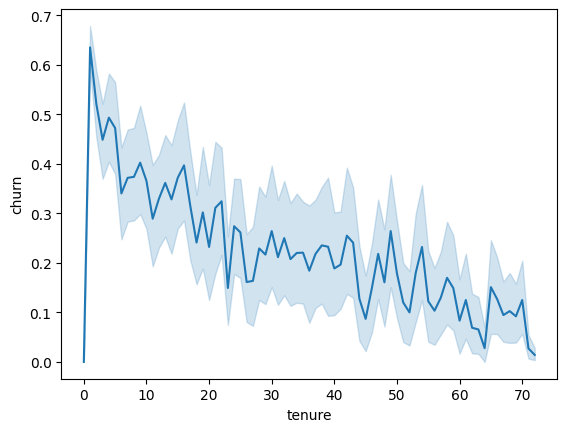

In [183]:
sns.lineplot(y=df_full_train.churn, x=df_full_train.tenure)

In [184]:
#sns.lineplot(y=df_full_train.churn, x=df_full_train.monthlycharges)

In [185]:
df_full_train[df_full_train.monthlycharges <=20].churn.mean()

np.float64(0.08795411089866156)

In [186]:
df_full_train[(df_full_train.monthlycharges > 20) ^ (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.2962962962962963)

In [187]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

## **3.8 - One-hot Encoding**

Using scikitlearn to encode categorical features

In [188]:
df_train["totalcharges"] = df_train["totalcharges"].replace("_", "0").astype("float64")
df_val["totalcharges"] = df_val["totalcharges"].replace("_", "0").astype("float64")
df_test["totalcharges"] = df_test["totalcharges"].replace("_", "0").astype("float64")

In [189]:
# Converting columns to binary values
from sklearn.feature_extraction import DictVectorizer

In [190]:
train_dicts = df_train[categorical + numerical].to_dict(orient="records")
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [191]:
dv = DictVectorizer(sparse=False)

In [192]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [193]:
list(dv.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [194]:
cols = dv.transform(train_dicts)

In [195]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [196]:
X_train = dv.transform(train_dicts)
X_train.shape

(4225, 45)

In [197]:
val_dicts = df_val[categorical + numerical].to_dict(orient="records")
dv.fit(val_dicts)
X_val = dv.transform(val_dicts)

In [198]:
X_val.shape

(1409, 45)

## **3.9 - Logistic Regression**

In [199]:
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [200]:
z = np.linspace(-5, 5, 101)
z

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [201]:
sigmoid(z)

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

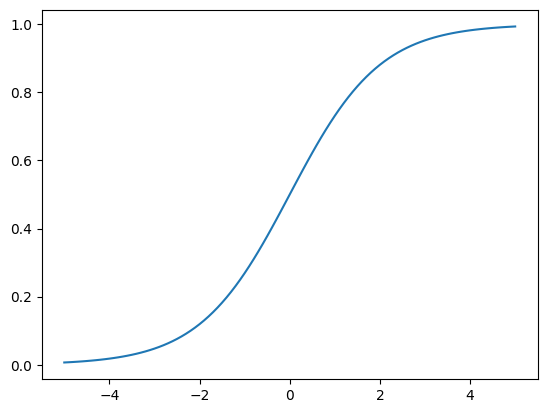

In [202]:
plt.plot(z, sigmoid(z))

In [203]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = result + xi[j] * w[j]
    return sigmoid(result)

## **3.10 - Training logistic regression with Scikit-Learn**

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
model = LogisticRegression(max_iter=200)

In [206]:
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [207]:
# To find w values: 
model.coef_[0]

array([ 5.84576317e-01, -1.02231680e-01, -6.08074412e-01, -2.41533266e-02,
       -1.01576449e-01,  5.13251064e-02, -1.04016756e-01, -7.30381257e-02,
       -4.31080646e-02, -8.26217111e-02, -3.81026043e-01,  3.59313024e-01,
       -1.04016756e-01,  3.39118401e-03, -2.53310523e-01,  1.46488626e-01,
       -1.89078788e-02,  5.22820317e-02, -1.04016756e-01, -7.39950509e-02,
        2.17464851e-01, -1.04016756e-01, -2.39177871e-01, -2.49214835e-01,
        1.23485059e-01, -1.12589176e-01, -1.31406000e-02, -1.00299354e-01,
       -3.93732179e-02,  4.82328918e-02, -3.42900958e-02,  1.46488626e-01,
       -2.72218402e-01,  2.08561391e-01, -1.03978172e-01, -1.04016756e-01,
        8.22651527e-02, -6.42319445e-02, -1.04016756e-01,  4.25189252e-02,
        1.65360095e-01, -1.04016756e-01, -1.87073114e-01, -6.58947108e-02,
        3.58866945e-04])

In [208]:
# These are "soft" predictions
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00785194, 0.20322563, 0.21579669, ..., 0.14975663, 0.78483756,
       0.81103273], shape=(1409,))

In [209]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [210]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [211]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [212]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [213]:
(y_val == churn_decision.astype(int)).mean()

np.float64(0.8034066713981547)

In [214]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred["actual"] = y_val
df_pred.head()

,probability,prediction,actual
0,0.007852,0,0
1,0.203226,0,0
2,0.215797,0,0
3,0.573538,1,1
4,0.211066,0,0


In [215]:
df_pred["correct"] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.007852,0,0,True
1,0.203226,0,0,True
2,0.215797,0,0,True
3,0.573538,1,1,True
4,0.211066,0,0,True
...,...,...,...,...
1404,0.296098,0,0,True
1405,0.037994,0,1,False
1406,0.149757,0,0,True
1407,0.784838,1,1,True


In [216]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

## **3.11 - Model Interpretation**

In [217]:
list(map(float, model.coef_[0].round(5)))

[0.58458,
 -0.10223,
 -0.60807,
 -0.02415,
 -0.10158,
 0.05133,
 -0.10402,
 -0.07304,
 -0.04311,
 -0.08262,
 -0.38103,
 0.35931,
 -0.10402,
 0.00339,
 -0.25331,
 0.14649,
 -0.01891,
 0.05228,
 -0.10402,
 -0.074,
 0.21746,
 -0.10402,
 -0.23918,
 -0.24921,
 0.12349,
 -0.11259,
 -0.01314,
 -0.1003,
 -0.03937,
 0.04823,
 -0.03429,
 0.14649,
 -0.27222,
 0.20856,
 -0.10398,
 -0.10402,
 0.08227,
 -0.06423,
 -0.10402,
 0.04252,
 0.16536,
 -0.10402,
 -0.18707,
 -0.06589,
 0.00036]

In [218]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [219]:
# We can combine the two to get the weights of each category
dict(zip(dv.get_feature_names_out(), list(map(float, model.coef_[0].round(5))) ) )

{'contract=month-to-month': 0.58458,
 'contract=one_year': -0.10223,
 'contract=two_year': -0.60807,
 'dependents=no': -0.02415,
 'dependents=yes': -0.10158,
 'deviceprotection=no': 0.05133,
 'deviceprotection=no_internet_service': -0.10402,
 'deviceprotection=yes': -0.07304,
 'gender=female': -0.04311,
 'gender=male': -0.08262,
 'internetservice=dsl': -0.38103,
 'internetservice=fiber_optic': 0.35931,
 'internetservice=no': -0.10402,
 'monthlycharges': 0.00339,
 'multiplelines=no': -0.25331,
 'multiplelines=no_phone_service': 0.14649,
 'multiplelines=yes': -0.01891,
 'onlinebackup=no': 0.05228,
 'onlinebackup=no_internet_service': -0.10402,
 'onlinebackup=yes': -0.074,
 'onlinesecurity=no': 0.21746,
 'onlinesecurity=no_internet_service': -0.10402,
 'onlinesecurity=yes': -0.23918,
 'paperlessbilling=no': -0.24921,
 'paperlessbilling=yes': 0.12349,
 'partner=no': -0.11259,
 'partner=yes': -0.01314,
 'paymentmethod=bank_transfer_(automatic)': -0.1003,
 'paymentmethod=credit_card_(automat

In [220]:
small = ["contract", "tenure", "monthlycharges"]

In [221]:
df_train[small].iloc[:10].to_dict(orient="records")

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [222]:
dicts_train_small = df_train[small].to_dict(orient="records")
dicts_val_small = df_val[small].to_dict(orient="records")

In [223]:
dv_small = DictVectorizer(sparse=False)

In [224]:
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [225]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [226]:
X_train_small = dv_small.transform(dicts_train_small)

In [227]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [228]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [229]:
w = model_small.coef_[0]
w

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [230]:
dict(zip(dv_small.get_feature_names_out(), map(float, w.round(4))))

{'contract=month-to-month': 0.9711,
 'contract=one_year': -0.0238,
 'contract=two_year': -0.9483,
 'monthlycharges': 0.0275,
 'tenure': -0.0362}

## **3.12 - Using the Model**

In [231]:
df_full_train.totalcharges = df_full_train.totalcharges.replace("_", 0).astype(float)

In [232]:
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [233]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient="records")

In [234]:
dv = DictVectorizer(sparse=False)

In [235]:
X_train_full = dv.fit_transform(dicts_full_train)

In [236]:
y_train_full = df_full_train.churn.values

In [237]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_full, y_train_full)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [238]:
dicts_test = df_test[categorical + numerical].to_dict(orient="records")
dicts_test[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 41,
 'monthlycharges': 79.85,
 'totalcharges': 3320.75}

In [239]:
X_test = dv.fit_transform(dicts_test)

In [240]:
y_pred = model.predict_proba(X_test)[:, 1]

In [241]:
churn_decision = (y_pred >= 0.5)

In [242]:
(churn_decision == y_test).mean()

np.float64(0.8105039034776437)

In [256]:
# We want to determine how likely this customer is to churn
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [257]:
# Convert the customer to a list of values
X_customer = dv.transform(customer)

In [258]:
X_customer.shape

(1, 45)

In [259]:
model.predict_proba(X_customer)[0][1]

np.float64(0.6375704661276868)

In [261]:
y_test[-1]

np.int64(1)